In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
dftrain = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
# dftrain.head()
dftest = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
# x = dftrain.drop('label',axis = 1).values
# y = dftrain['label'].values
# # print("test")
# dftest.head()
x = pd.read_csv("/kaggle/input/digit-recognizer/train.csv").values[:5000,1:]
y = pd.read_csv("/kaggle/input/digit-recognizer/train.csv").values[:5000,0]
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv").values
print (dftrain.shape)
print (x.shape)
print (y.shape)
print (test.shape)

(42000, 785)
(5000, 784)
(5000,)
(28000, 784)


5


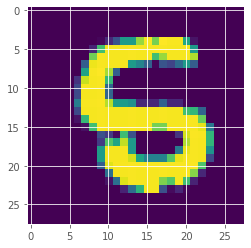

In [3]:
row = 19
print(y[row])
plt.imshow(x[row].reshape(28, 28))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_tr,x_cv,y_tr,y_cv = train_test_split(x,y,test_size = 0.3,random_state = 0)
print (x_tr.shape,y_tr.shape,x_cv.shape,y_cv.shape)

(3500, 784) (3500,) (1500, 784) (1500,)


In [5]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
k_val = range(1,8)
scores = []
for k in k_val:
    print("k=",str(k))
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_tr,y_tr)
    ycv_pred = model.predict(x_cv)
    accuracy = accuracy_score(ycv_pred,y_cv)
    scores.append(accuracy)
    print(classification_report(y_cv, ycv_pred))  
    print(confusion_matrix(y_cv, ycv_pred)) 



k= 1
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       0.91      0.98      0.95       168
           2       0.96      0.88      0.92       160
           3       0.90      0.91      0.90       146
           4       0.93      0.91      0.92       153
           5       0.92      0.90      0.91       145
           6       0.92      0.97      0.94       136
           7       0.93      0.95      0.94       157
           8       0.90      0.83      0.87       133
           9       0.86      0.87      0.87       146

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500

[[152   0   0   1   1   0   2   0   0   0]
 [  0 165   1   1   0   0   0   0   0   1]
 [  1   3 140   3   2   0   1   4   4   2]
 [  0   0   1 133   0   5   0   2   4   1]
 [  0   0   0   0 139   1   3   0   0  10]
 [  0   3   1   4   0

In [6]:
print (scores)

[0.9193333333333333, 0.9066666666666666, 0.916, 0.9153333333333333, 0.92, 0.9213333333333333, 0.9126666666666666]


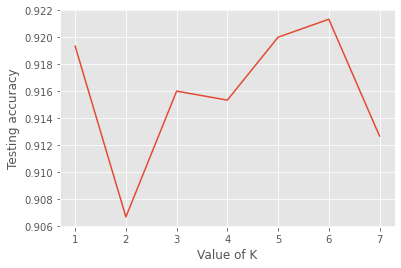

In [7]:
plt.plot(k_val,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [8]:
k = 6

model = KNeighborsClassifier(n_neighbors = k)
model.fit(x,y)
y_pred = model.predict(test)

1


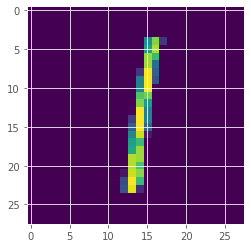

In [9]:
row = 800
print (y_pred[row])
plt.imshow(test[row].reshape((28, 28)))
plt.show()

In [10]:
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recog_Result.csv', index=False,header=True)